In [29]:
#Libraries for analysing dataset and visualisation

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
#Reading the dataset

Iris_data = pd.read_csv('Iris.csv')


### Exploratory analysis

In [31]:
#10 Records of dataset

Iris_data.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [32]:
#Basic Information 

Iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [33]:
#Numeric info about data

Iris_data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [34]:
#Data points count value for each class labels

Iris_data.Species.value_counts()

Iris-setosa        50
Iris-virginica     50
Iris-versicolor    50
Name: Species, dtype: int64

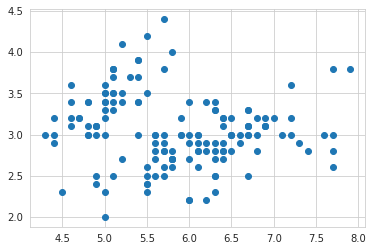

In [35]:
#Visualizing the dataset to find pattern

plt.scatter(Iris_data['SepalLengthCm'],Iris_data['SepalWidthCm'])
plt.show()

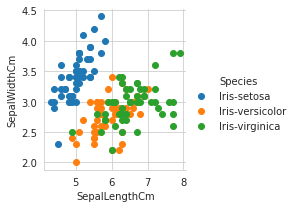

In [36]:
#Seaborn lib

sns.set_style('whitegrid')
sns.FacetGrid(Iris_data, hue = 'Species')    .map(plt.scatter, 'SepalLengthCm','SepalWidthCm')    .add_legend()

plt.show()

### Classification Model

In [37]:
#ID column will not be used by this model. Hence, we drop it

Iris_data.drop(['Id'],axis=1,inplace=True)

In [38]:
#Libraries for decision tree classifier and visualising tree structure

from sklearn import tree
import graphviz
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score


In [39]:
#Seperating Independent variables and target variables

X = Iris_data[['SepalLengthCm', 'SepalWidthCm','PetalLengthCm', 'PetalWidthCm']]
y = Iris_data['Species']

In [40]:
#Splitting dataset to test and train

Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, y, test_size=0.30, random_state=42)


In [41]:
#Splitting dataset to validation train and validation test

Xt, Xcv, Yt, Ycv = train_test_split(Xtrain, Ytrain, test_size=0.10, random_state=42)

[Text(111.60000000000001, 201.90857142857143, 'X[2] <= 2.6\ngini = 0.665\nsamples = 94\nvalue = [30, 30, 34]'),
 Text(74.4, 170.84571428571428, 'gini = 0.0\nsamples = 30\nvalue = [30, 0, 0]'),
 Text(148.8, 170.84571428571428, 'X[3] <= 1.55\ngini = 0.498\nsamples = 64\nvalue = [0, 30, 34]'),
 Text(74.4, 139.78285714285715, 'X[2] <= 5.0\ngini = 0.124\nsamples = 30\nvalue = [0, 28, 2]'),
 Text(37.2, 108.72, 'gini = 0.0\nsamples = 28\nvalue = [0, 28, 0]'),
 Text(111.60000000000001, 108.72, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 2]'),
 Text(223.20000000000002, 139.78285714285715, 'X[2] <= 5.05\ngini = 0.111\nsamples = 34\nvalue = [0, 2, 32]'),
 Text(186.0, 108.72, 'X[1] <= 2.9\ngini = 0.375\nsamples = 8\nvalue = [0, 2, 6]'),
 Text(148.8, 77.65714285714284, 'gini = 0.0\nsamples = 5\nvalue = [0, 0, 5]'),
 Text(223.20000000000002, 77.65714285714284, 'X[0] <= 5.95\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(186.0, 46.59428571428572, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 T

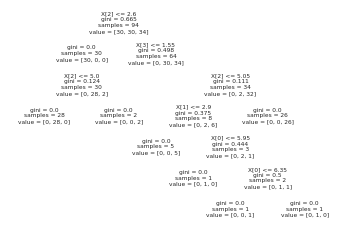

In [42]:
#Decision Tree Classifier with the training dataset

Iris_clf = DecisionTreeClassifier(criterion='gini',min_samples_split=2)
Iris_clf.fit(Xt, Yt)

#Visualized the Tree which is formed on train dataset

tree.plot_tree(Iris_clf)

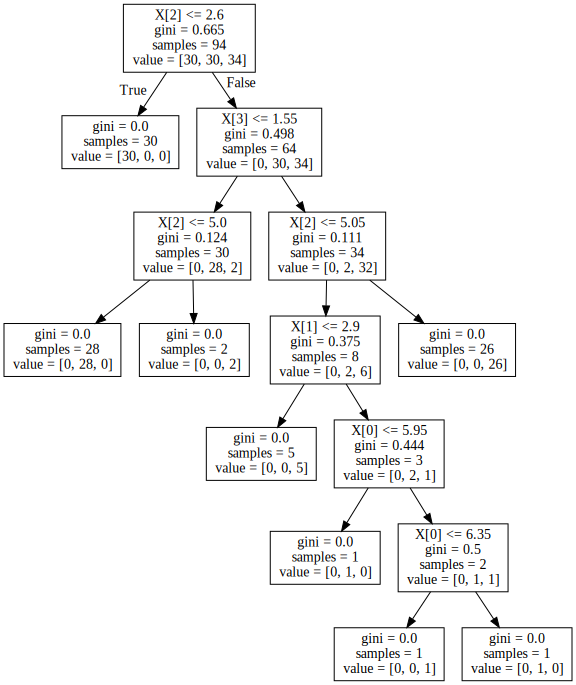

In [43]:
#Visualizing Decision Tree using graphviz library

dot_data = tree.export_graphviz(Iris_clf, out_file=None)

graph = graphviz.Source(dot_data)
graph

In [44]:
#Cross Validation for accuracy and prediction

print('Accuracy score is:',cross_val_score(Iris_clf, Xt, Yt, cv=3, scoring='accuracy').mean())

Accuracy score is: 0.9361559139784946


In [45]:
#Validation test data on our trained model for getting performance metrices

from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

Y_hat = Iris_clf.predict(Xcv)


print('Accuracy score for validation test data is:',accuracy_score(Ycv, Y_hat))
multilabel_confusion_matrix(Ycv , Y_hat)

Accuracy score for validation test data is: 0.8181818181818182


array([[[10,  0],
        [ 0,  1]],

       [[ 3,  1],
        [ 1,  6]],

       [[ 7,  1],
        [ 1,  2]]])

In [46]:
#Checking our model performance on actual unseen test data.. 
YT_hat = Iris_clf.predict(Xtest)
YT_hat

print('Model Accuracy Score on totally unseen data(Xtest) is:',accuracy_score(Ytest, YT_hat)*100,'%')
multilabel_confusion_matrix(Ytest , YT_hat)

Model Accuracy Score on totally unseen data(Xtest) is: 95.55555555555556 %


array([[[26,  0],
        [ 0, 19]],

       [[32,  0],
        [ 2, 11]],

       [[30,  2],
        [ 0, 13]]])

[Text(167.4, 199.32, 'X[3] <= 0.8\ngini = 0.664\nsamples = 105\nvalue = [31, 37, 37]'),
 Text(141.64615384615385, 163.07999999999998, 'gini = 0.0\nsamples = 31\nvalue = [31, 0, 0]'),
 Text(193.15384615384616, 163.07999999999998, 'X[3] <= 1.75\ngini = 0.5\nsamples = 74\nvalue = [0, 37, 37]'),
 Text(103.01538461538462, 126.83999999999999, 'X[2] <= 4.95\ngini = 0.214\nsamples = 41\nvalue = [0, 36, 5]'),
 Text(51.50769230769231, 90.6, 'X[3] <= 1.6\ngini = 0.056\nsamples = 35\nvalue = [0, 34, 1]'),
 Text(25.753846153846155, 54.359999999999985, 'gini = 0.0\nsamples = 34\nvalue = [0, 34, 0]'),
 Text(77.26153846153846, 54.359999999999985, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(154.52307692307693, 90.6, 'X[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(128.76923076923077, 54.359999999999985, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(180.27692307692308, 54.359999999999985, 'X[0] <= 6.95\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(154.5230769

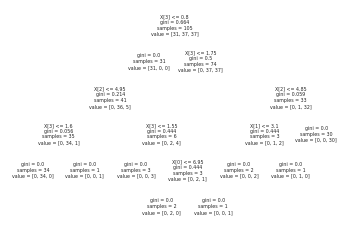

In [47]:
#Training model on Actual train data

Iris_Fclf = DecisionTreeClassifier(criterion='gini',min_samples_split=2)
Iris_Fclf.fit(Xtrain, Ytrain)

#Visualize tree structure

tree.plot_tree(Iris_Fclf)

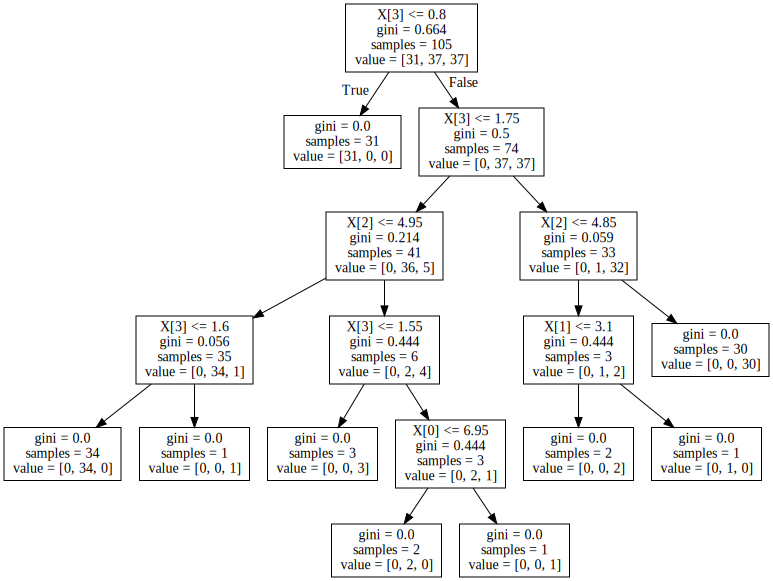

In [48]:
#Final Decision tree visualisation using graphviz

dot_data = tree.export_graphviz(Iris_Fclf, out_file=None)
graph = graphviz.Source(dot_data)
graph

In [49]:
#Performance of model on Actual Test data

YT_Fhat = Iris_Fclf.predict(Xtest)
YT_Fhat

print('Model Accuracy Score on totally unseen data(Xtest) is:',accuracy_score(Ytest, YT_Fhat)*100,'%')
multilabel_confusion_matrix(Ytest , YT_Fhat)

Model Accuracy Score on totally unseen data(Xtest) is: 100.0 %


array([[[26,  0],
        [ 0, 19]],

       [[32,  0],
        [ 0, 13]],

       [[32,  0],
        [ 0, 13]]])

In [50]:
#Testing for New points except from Dataset

Test_point = [[5.4,3.0,4.5,1.5],
             [6.5,2.8,4.6,1.5],
             [5.1,2.5,3.0,1.1],
             [5.1,3.3,1.7,0.5],
             [6.0,2.7,5.1,1.6],
             [6.0,2.2,5.0,1.5]]

print(Iris_Fclf.predict(Test_point))

['Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa'
 'Iris-versicolor' 'Iris-virginica']
